Dataset Shape: (1347681, 15)

First 5 rows:
         id   issue_d   revenue  dti_n  loan_amnt  fico_n  experience_c  \
0  68407277  Dec-2015   55000.0   5.91       3600   677.0             1   
1  68355089  Dec-2015   65000.0  16.06      24700   717.0             1   
2  68341763  Dec-2015   71000.0  13.85      20000   697.0             1   
3  68476807  Dec-2015  104433.0  25.37      10400   697.0             1   
4  68426831  Dec-2015   34000.0  10.20      11950   692.0             1   

  emp_length             purpose home_ownership_n addr_state zip_code  \
0  10+ years  debt_consolidation         MORTGAGE         PA    190xx   
1  10+ years      small_business         MORTGAGE         SD    577xx   
2  10+ years    home_improvement         MORTGAGE         IL    605xx   
3    3 years      major_purchase         MORTGAGE         PA    174xx   
4    4 years  debt_consolidation             RENT         GA    300xx   

   Default               title desc  
0        0  Debt consolidati

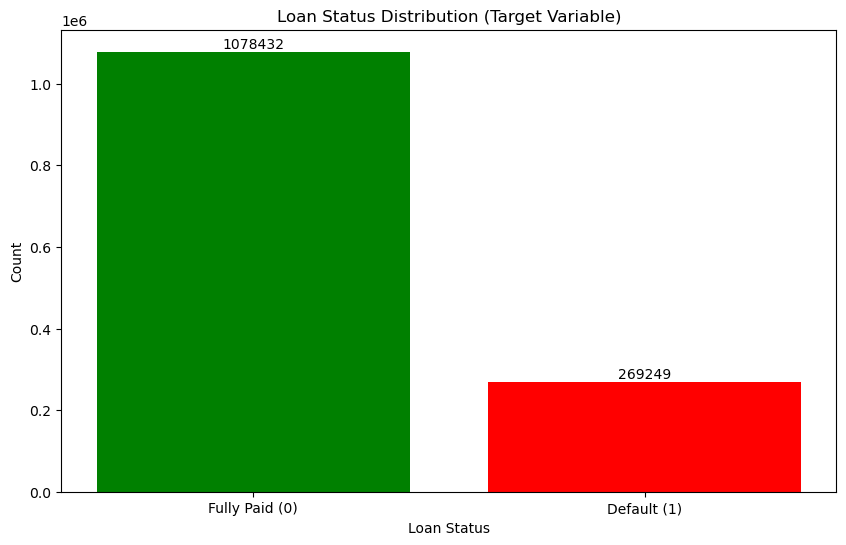

Class distribution:
Default
0    1078432
1     269249
Name: count, dtype: int64
Default rate: 19.98%


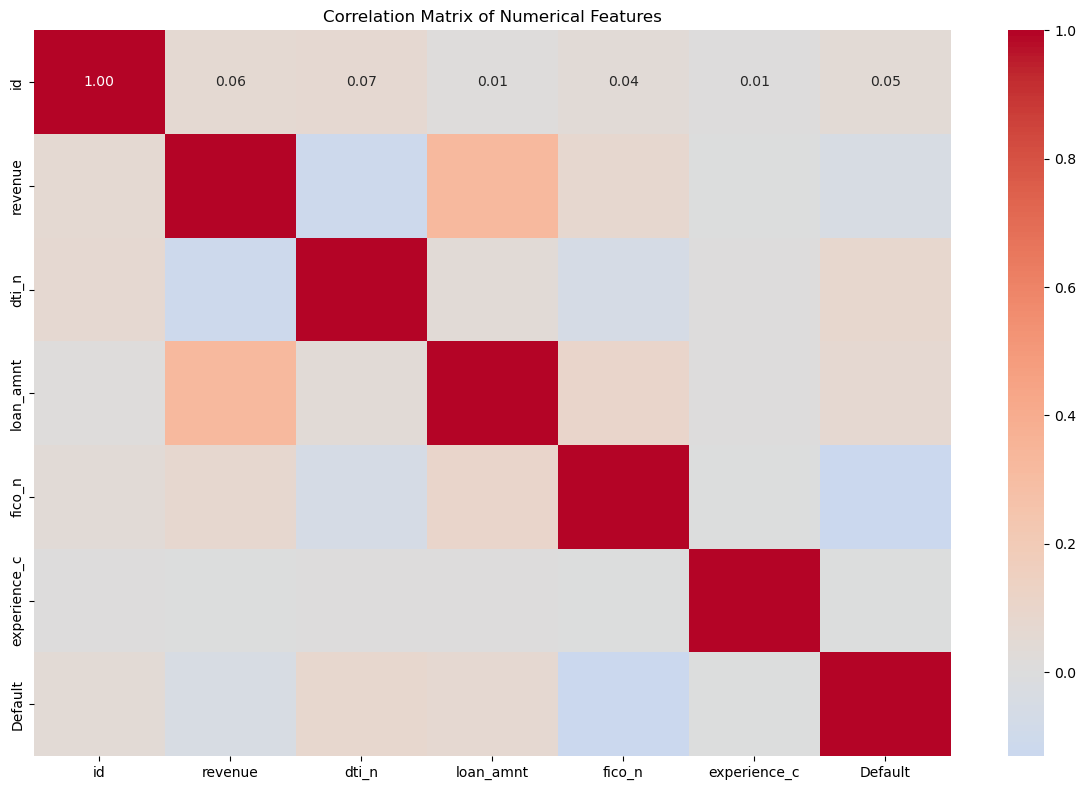

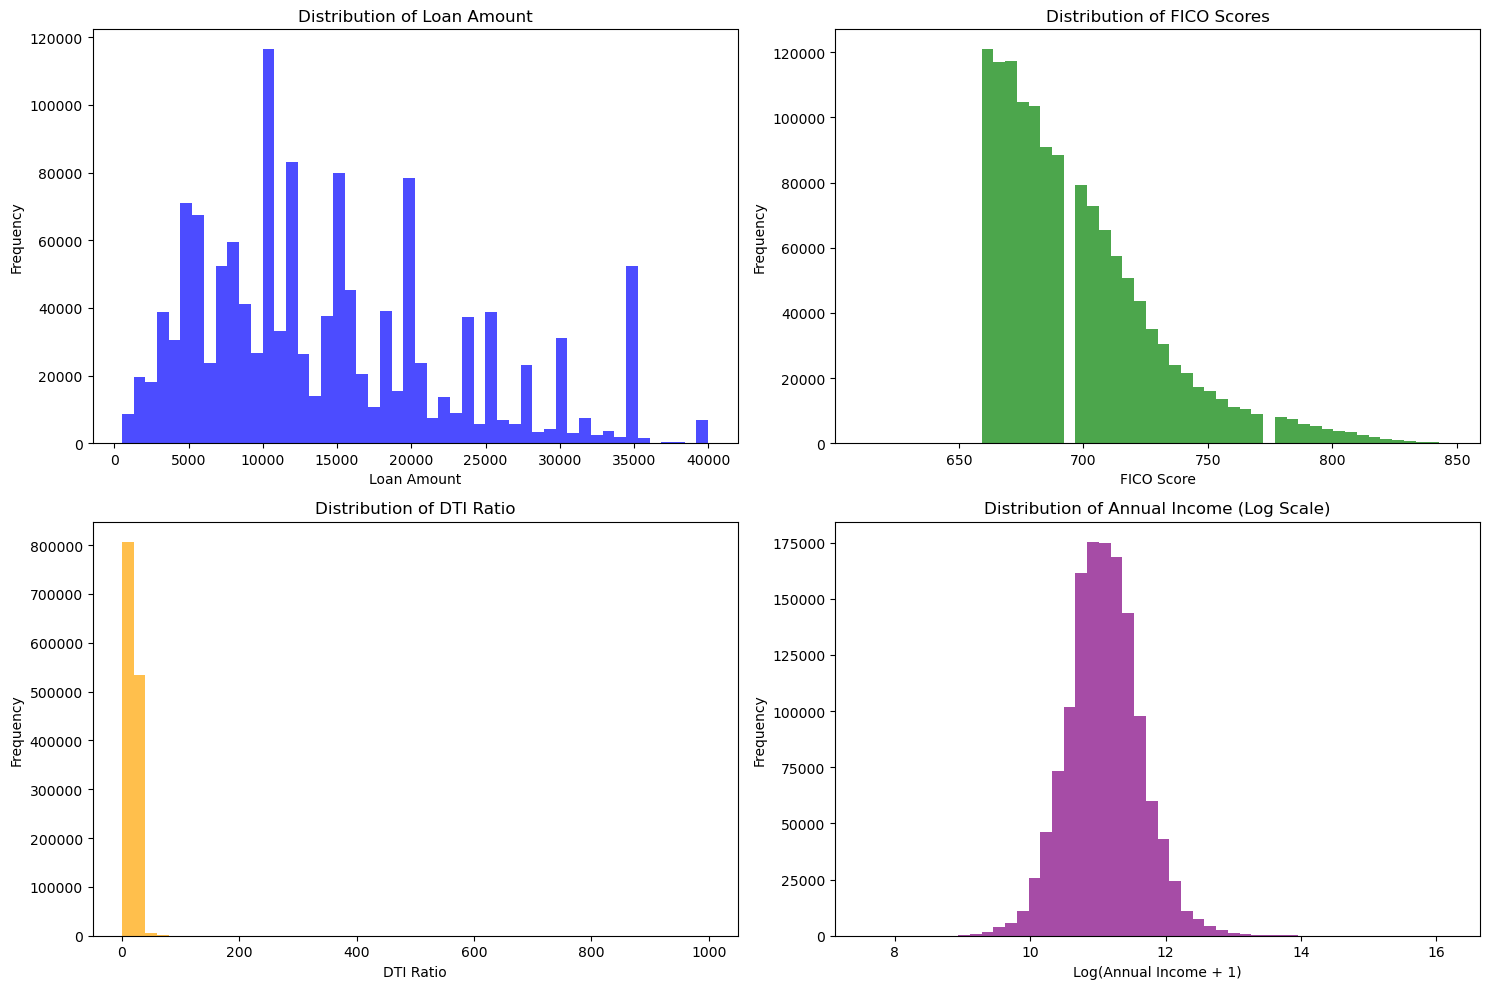

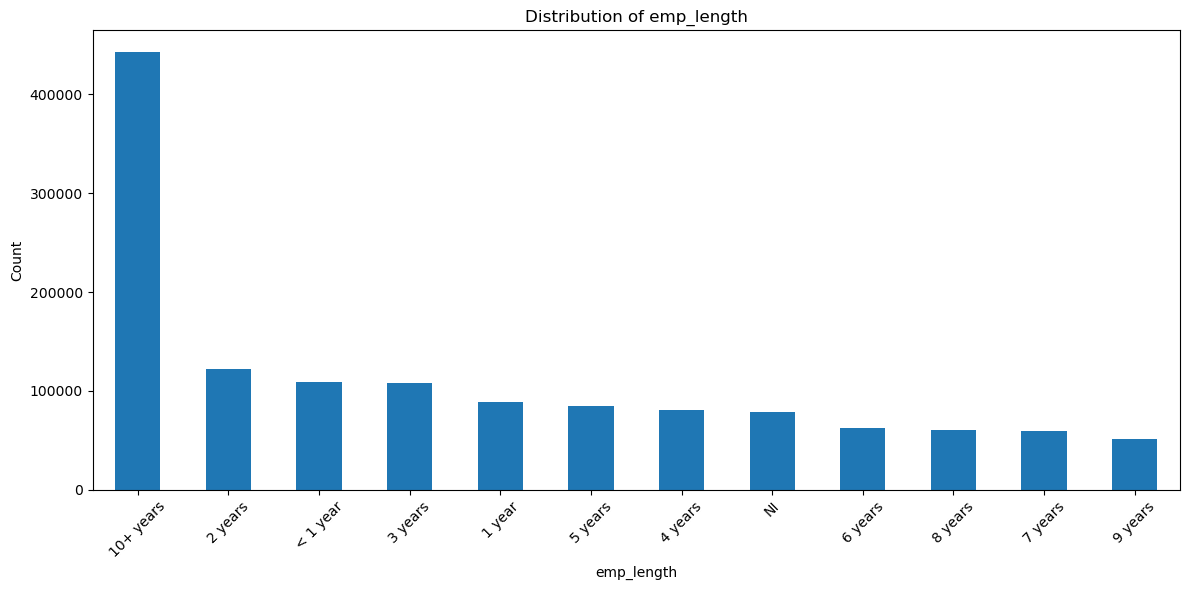

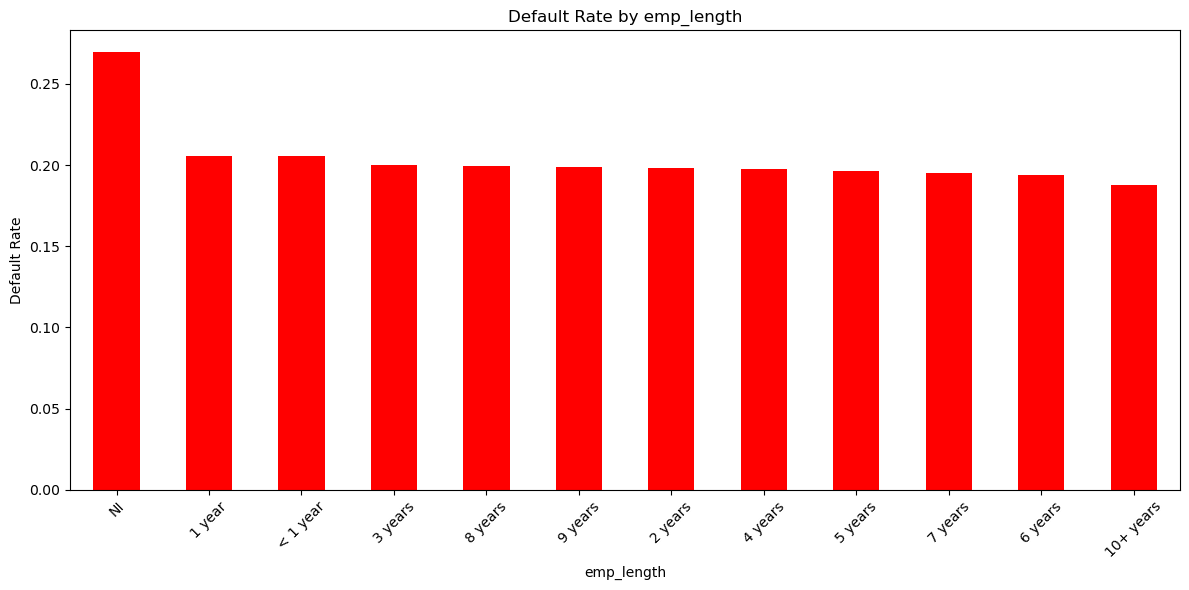

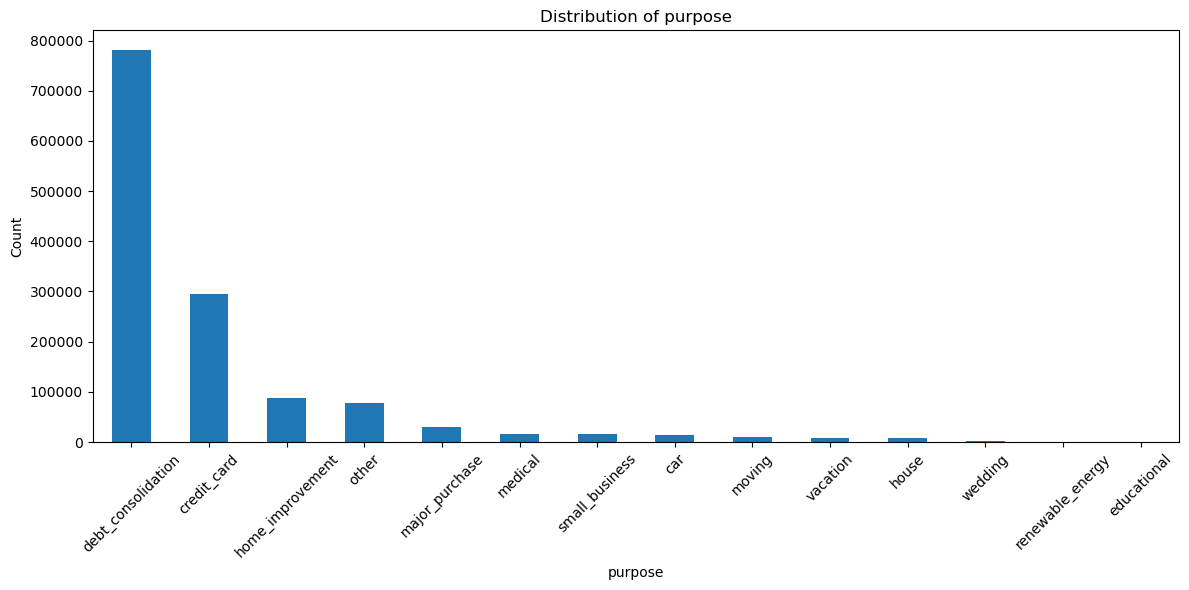

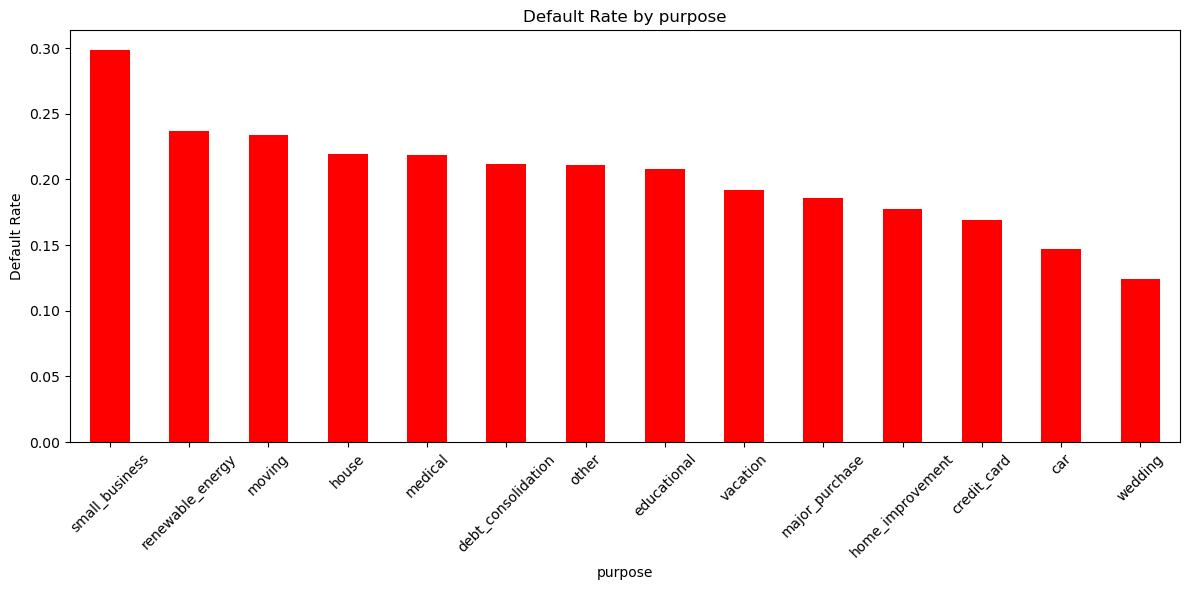

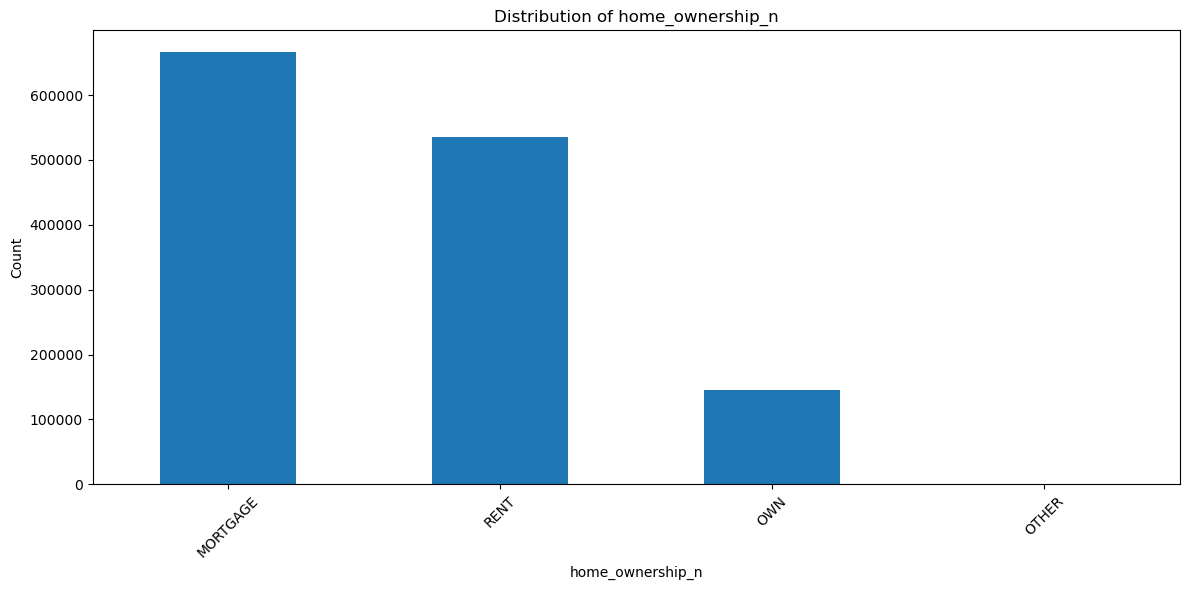

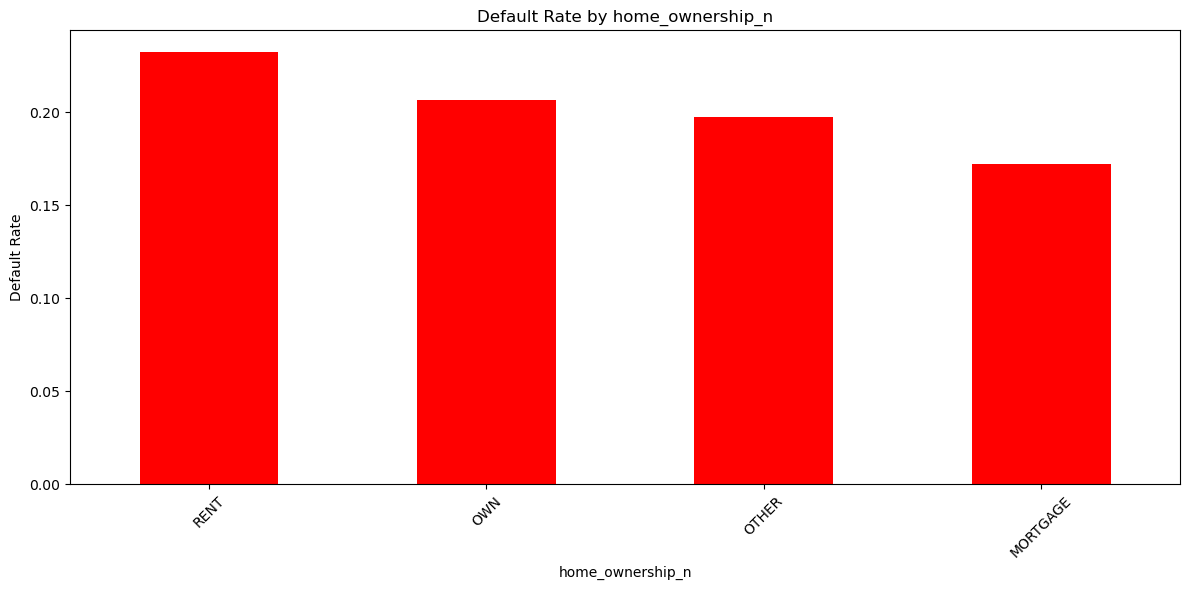

EDA completed successfully! Save insights for feature engineering.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('../data/raw/LC_loans_granting_model_dataset.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nMissing Values Percentage:")
print((df.isnull().sum() / len(df)) * 100)

# Basic statistics
print("\nStatistical Summary:")
print(df.describe())

# Target variable distribution
plt.figure(figsize=(10, 6))
target_counts = df['Default'].value_counts()
plt.bar(['Fully Paid (0)', 'Default (1)'], target_counts.values, color=['green', 'red'])
plt.title('Loan Status Distribution (Target Variable)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom')
plt.show()

print(f"Class distribution:\n{target_counts}")
print(f"Default rate: {(target_counts[1] / len(df)) * 100:.2f}%")

# Correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Distribution of key features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loan amount distribution
axes[0,0].hist(df['loan_amnt'], bins=50, alpha=0.7, color='blue')
axes[0,0].set_title('Distribution of Loan Amount')
axes[0,0].set_xlabel('Loan Amount')
axes[0,0].set_ylabel('Frequency')

# FICO score distribution
axes[0,1].hist(df['fico_n'], bins=50, alpha=0.7, color='green')
axes[0,1].set_title('Distribution of FICO Scores')
axes[0,1].set_xlabel('FICO Score')
axes[0,1].set_ylabel('Frequency')

# DTI ratio distribution
axes[1,0].hist(df['dti_n'], bins=50, alpha=0.7, color='orange')
axes[1,0].set_title('Distribution of DTI Ratio')
axes[1,0].set_xlabel('DTI Ratio')
axes[1,0].set_ylabel('Frequency')

# Annual income distribution (log scale for better visualization)
axes[1,1].hist(np.log1p(df['revenue']), bins=50, alpha=0.7, color='purple')
axes[1,1].set_title('Distribution of Annual Income (Log Scale)')
axes[1,1].set_xlabel('Log(Annual Income + 1)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Categorical variables analysis
categorical_cols = ['emp_length', 'purpose', 'home_ownership_n']

for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(12, 6))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Default rate by category
        default_rates = df.groupby(col)['Default'].mean().sort_values(ascending=False)
        plt.figure(figsize=(12, 6))
        default_rates.plot(kind='bar', color='red')
        plt.title(f'Default Rate by {col}')
        plt.xlabel(col)
        plt.ylabel('Default Rate')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

print("EDA completed successfully! Save insights for feature engineering.")